# Plot Model Weights

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (20, 20), 'figure.dpi': 300}
)

## Load Weights

In [2]:
from common.paths import PLS_WEIGHTS, RIDGE_WEIGHTS

pls_weights = np.load(PLS_WEIGHTS)
ridge_weights = np.load(RIDGE_WEIGHTS)

selected_features = pls_weights
# selected_features = ridge_weights

print(selected_features.shape, np.min(selected_features), np.max(selected_features))

(34716,) -0.015343373928346546 0.012819247204630567


## Plot Weights

In [3]:
from common.plotting import create_power_fc_matrix, plot_connections
from mne.viz import circular_layout, plot_connectivity_circle

### Nilearn

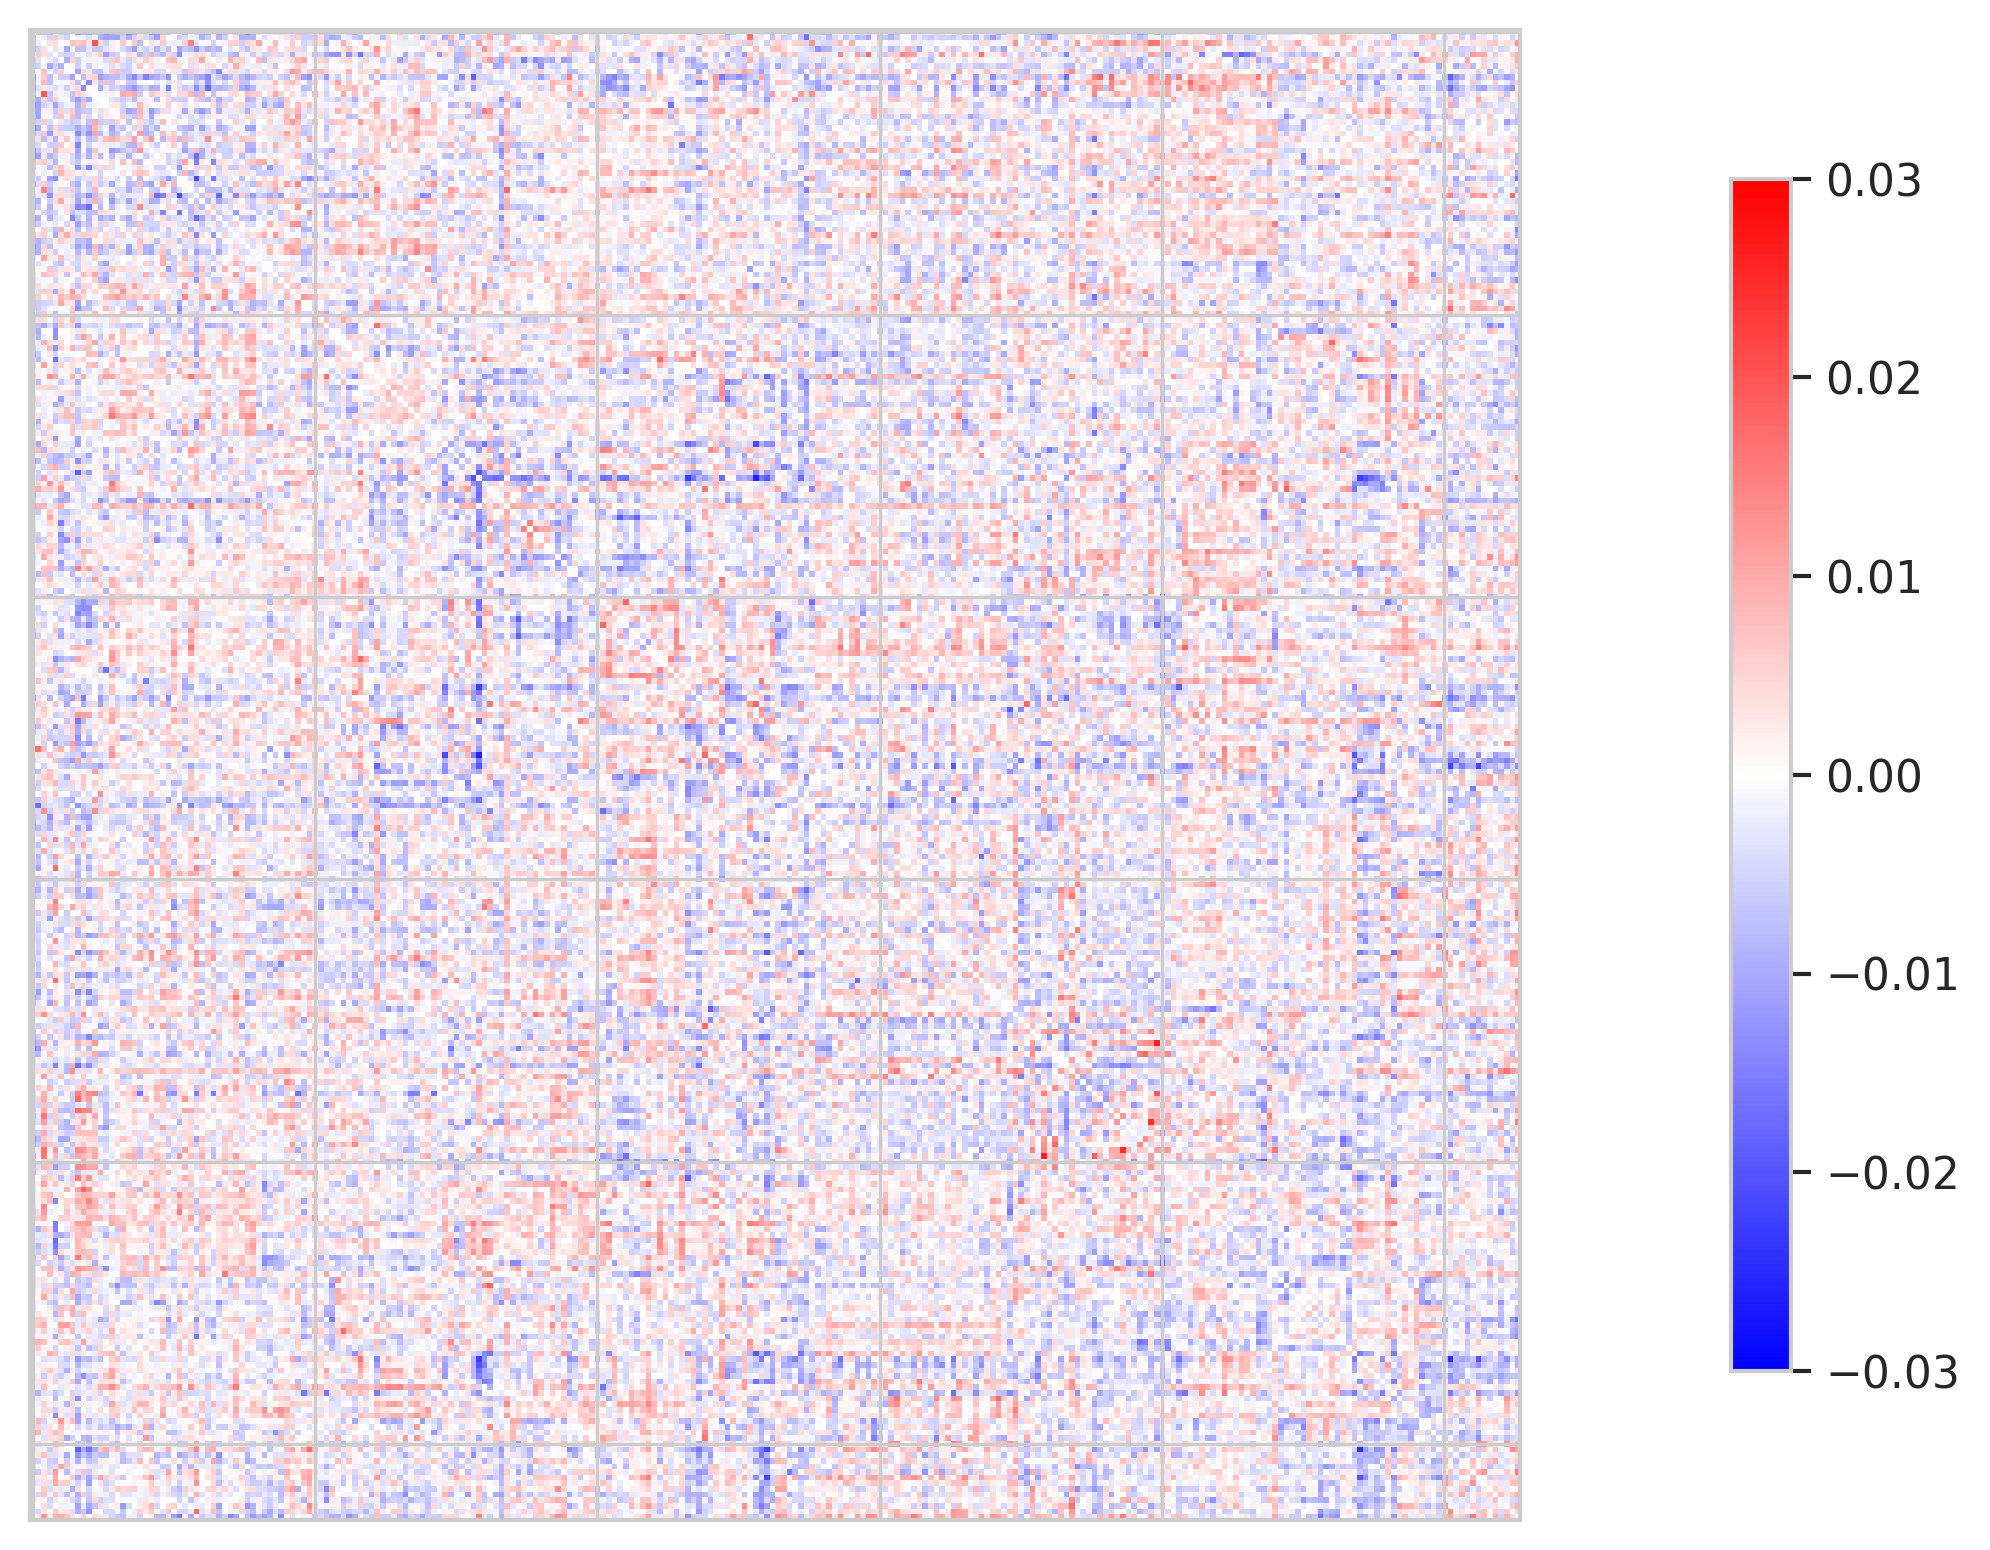

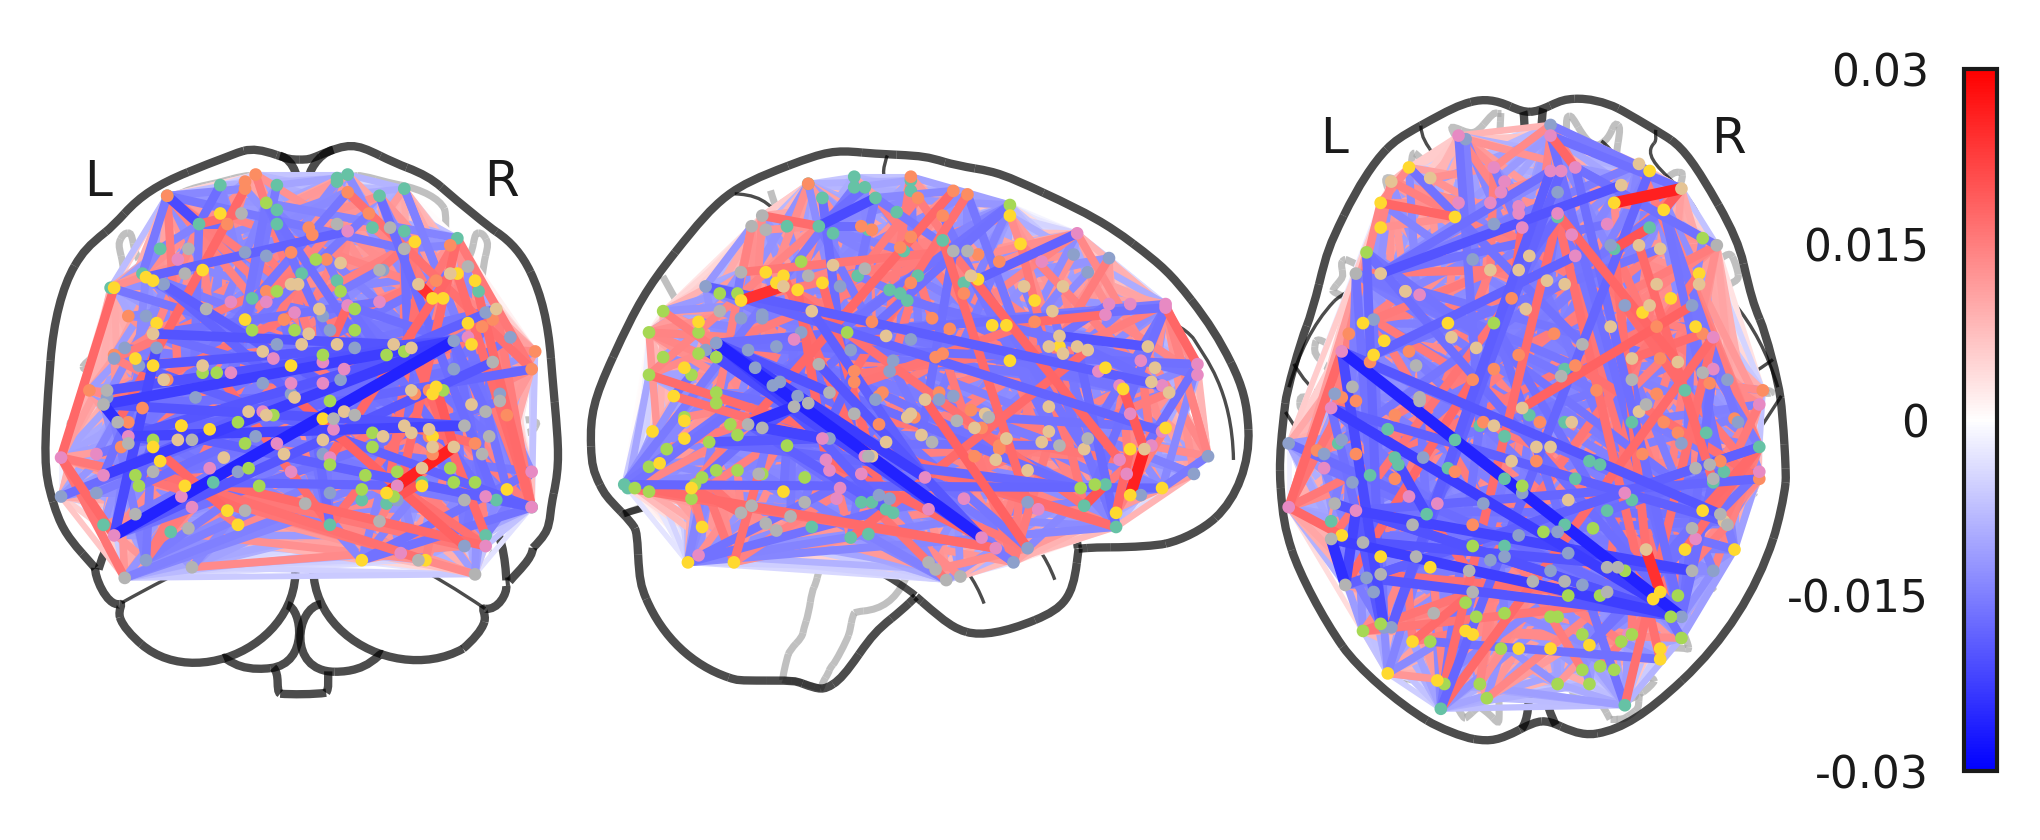

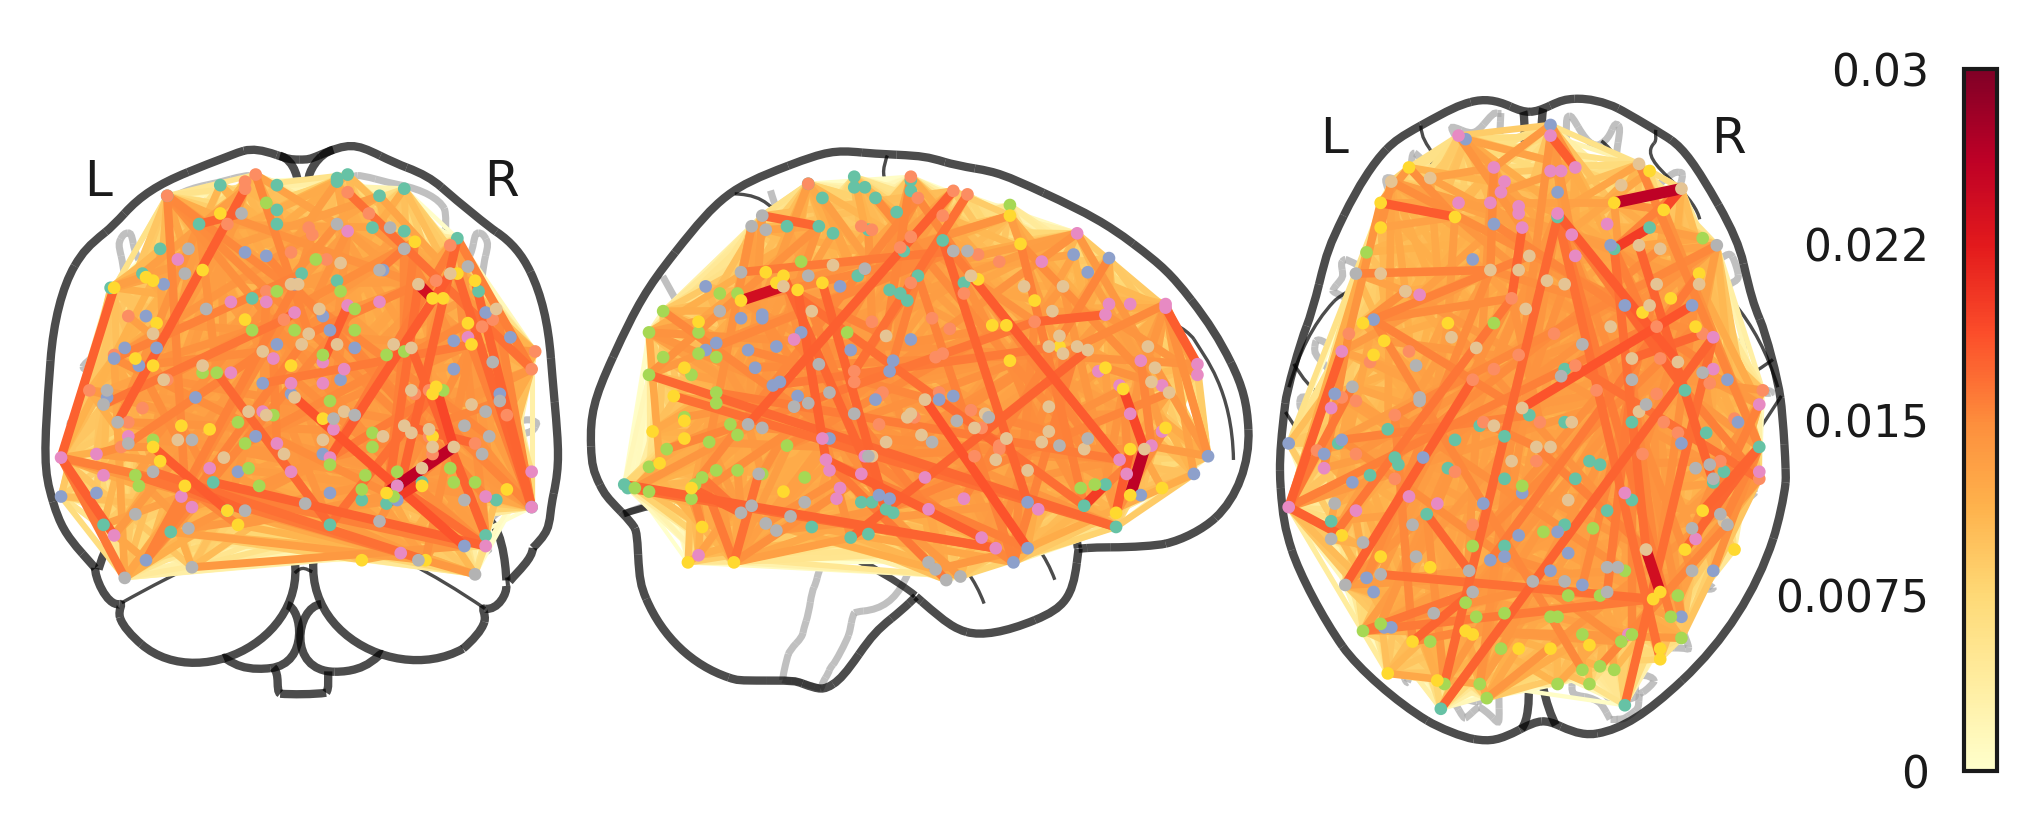

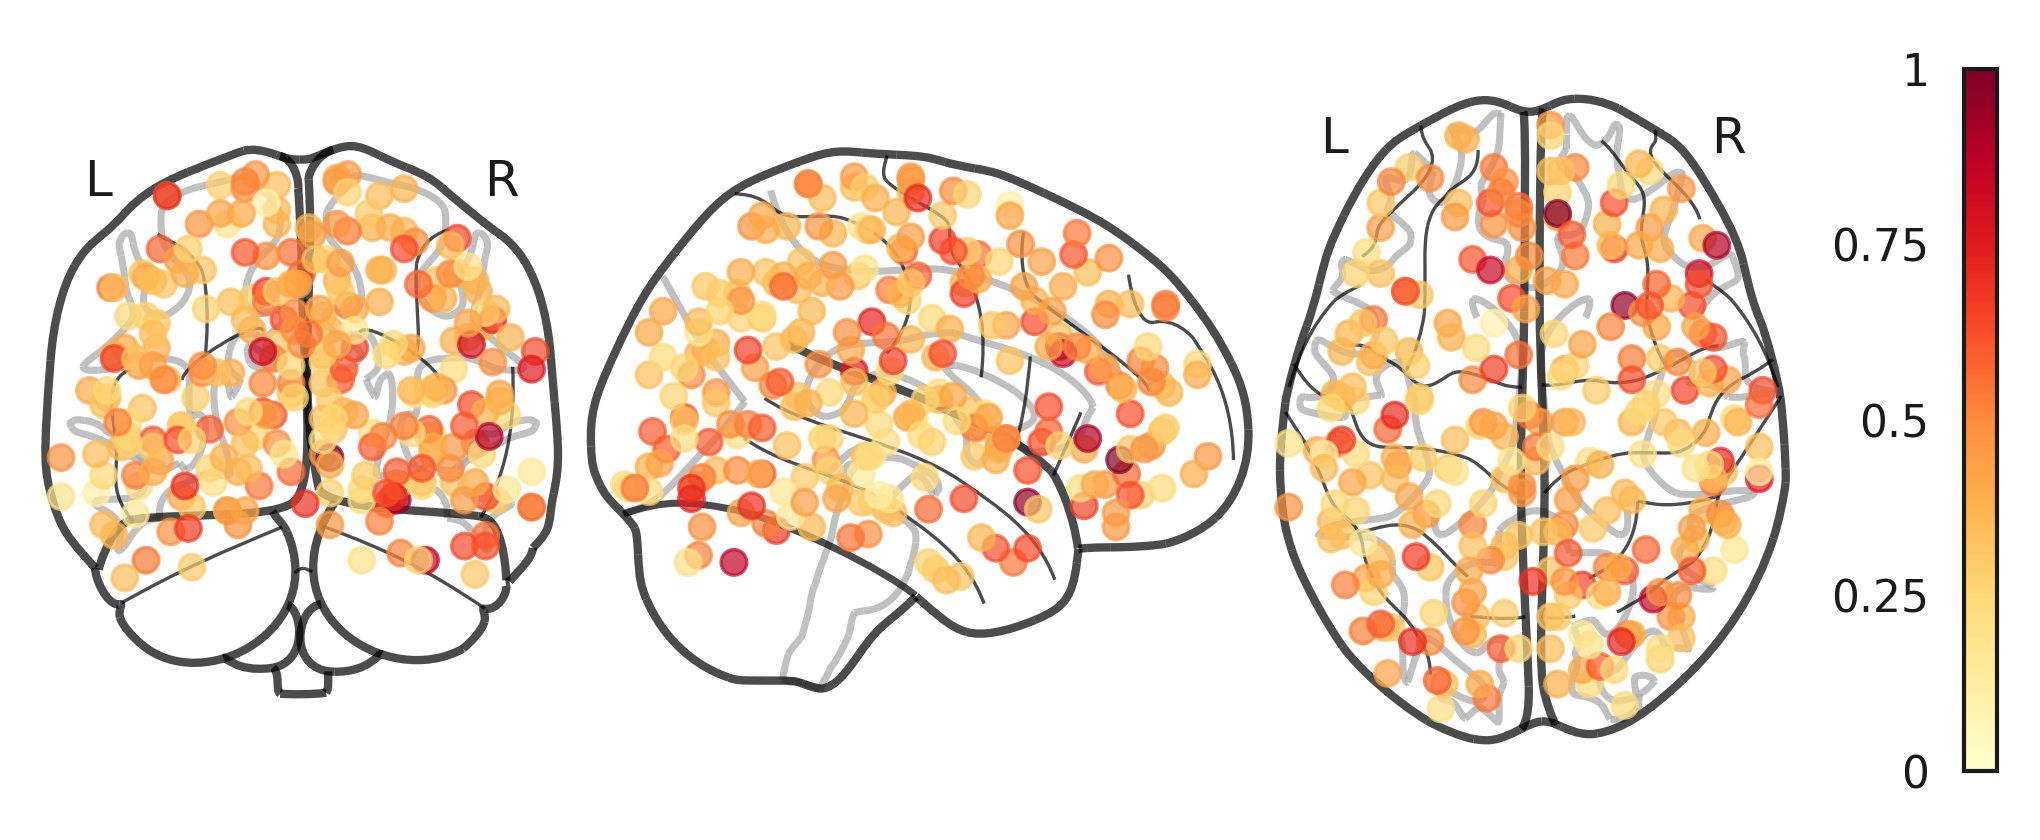

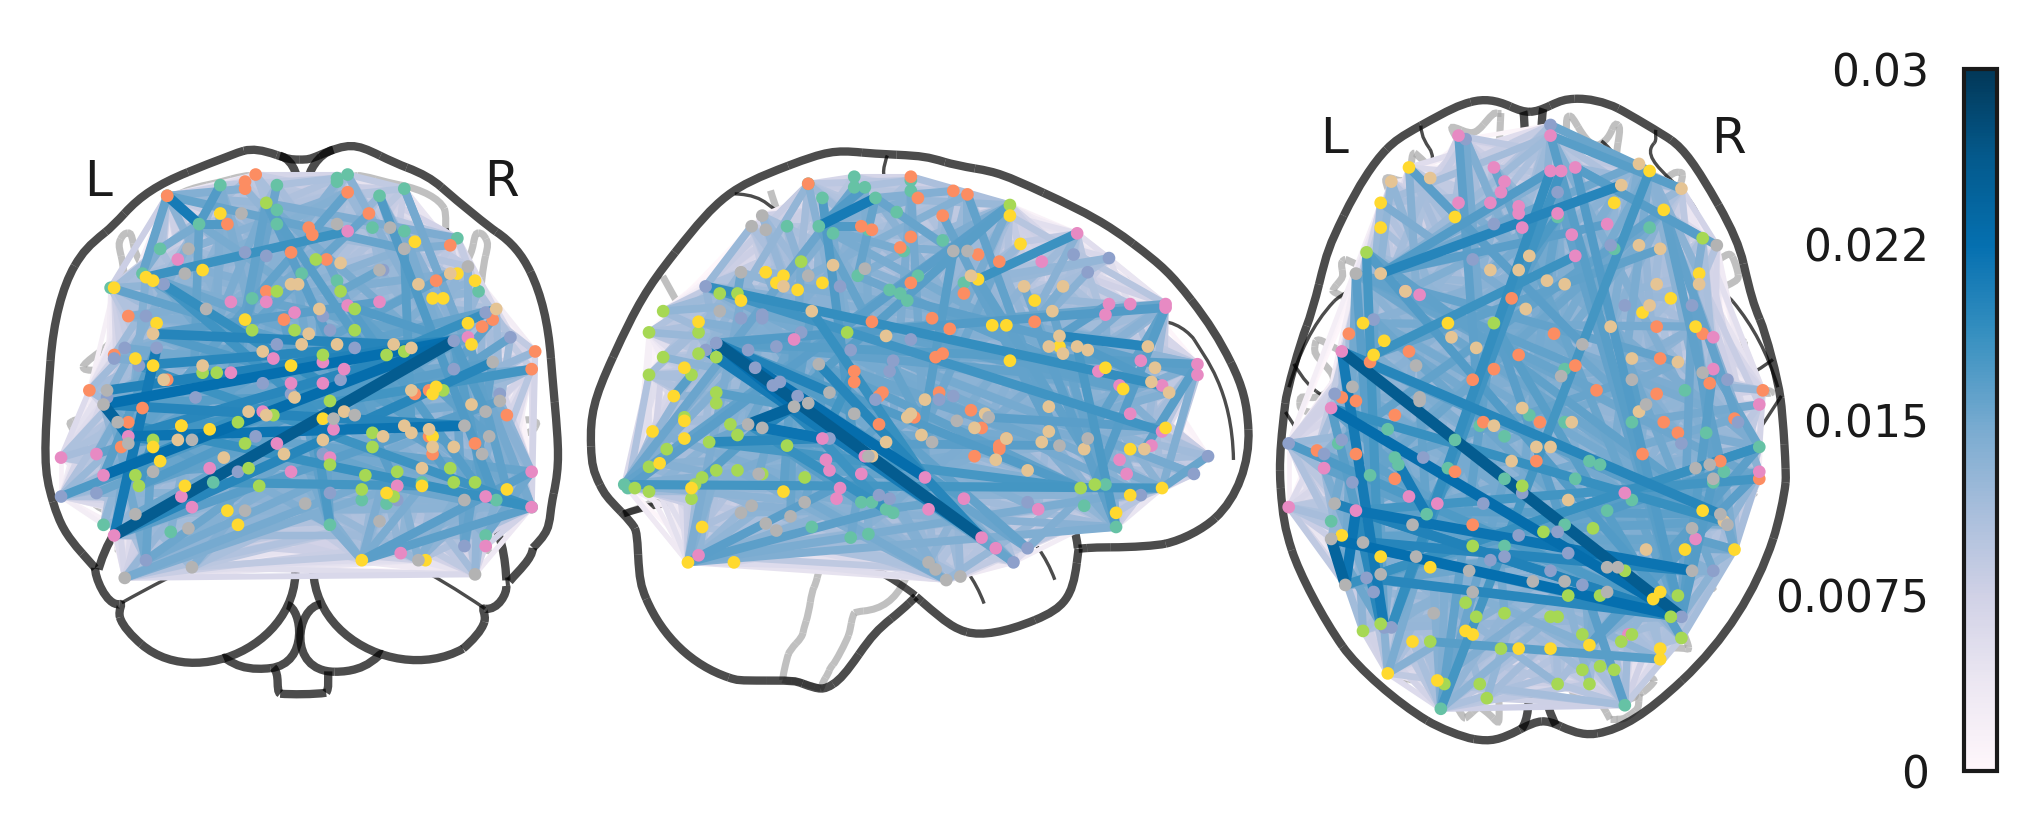

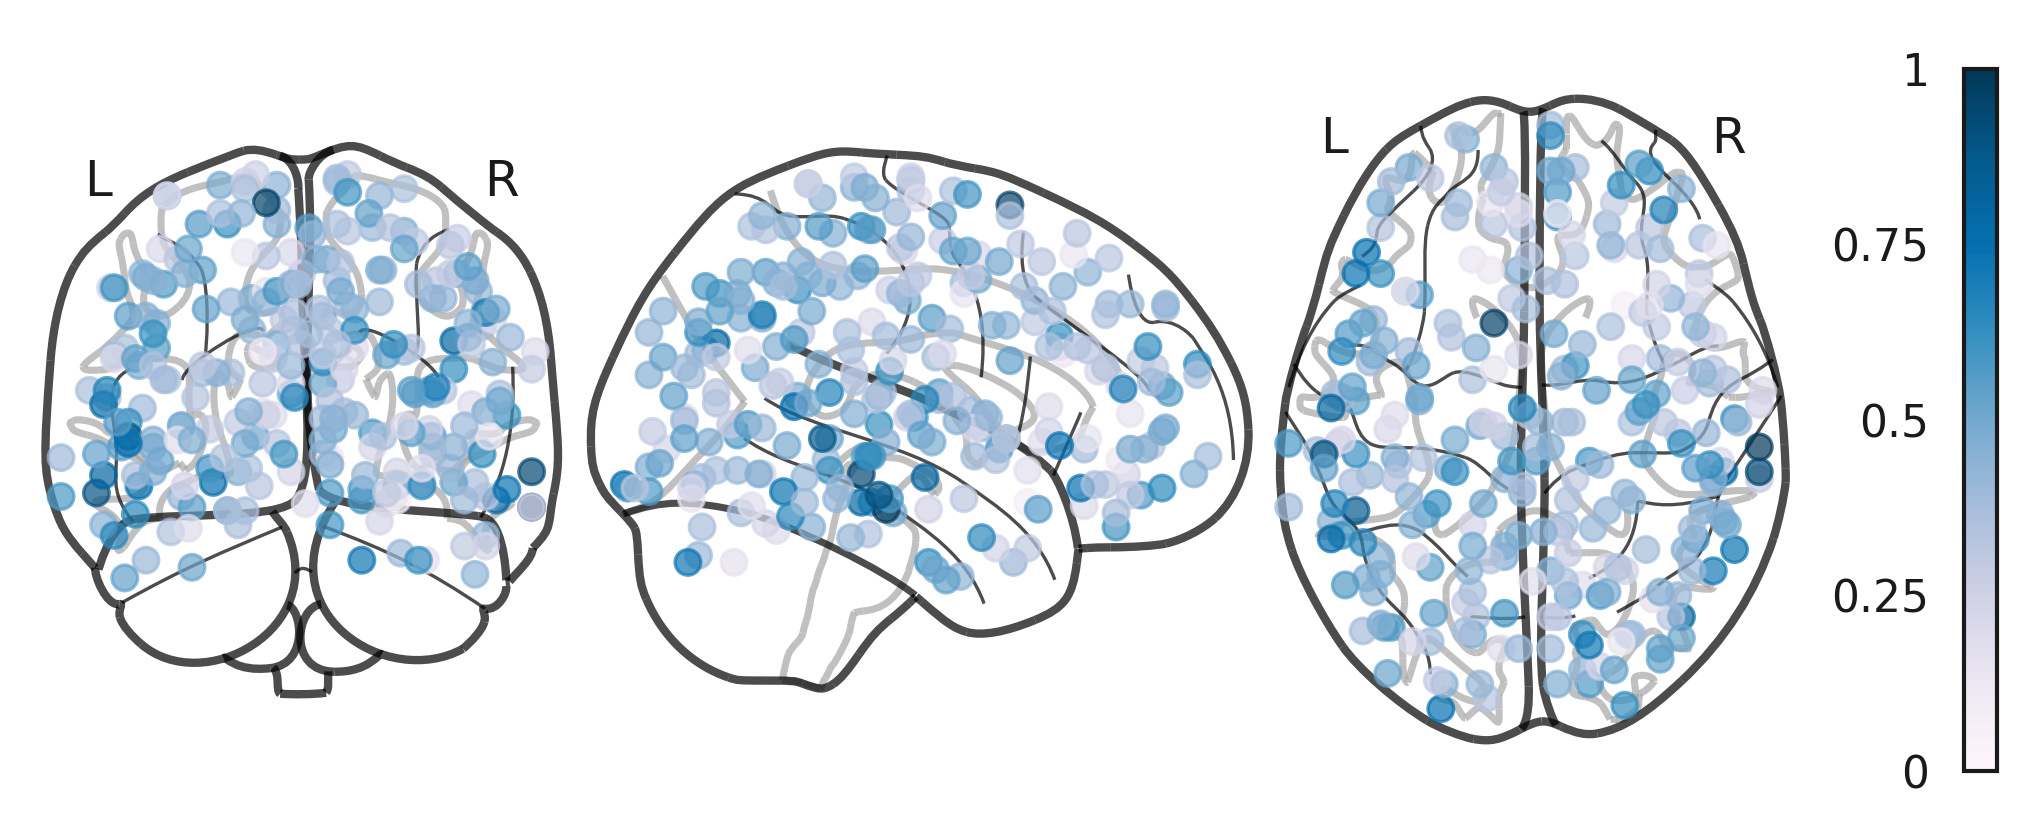

In [45]:
plot_connections(selected_features, -0.03, 0.03, False)

### MNE

In [4]:
from operator import itemgetter
from common.paths import POWER

power_labels = pd.read_csv(POWER, index_col='ROI')
node_names = [str(node_num) for node_num in range(1, 265)]
node_labels = list(zip(node_names, power_labels['Assignment']))
node_labels.sort(key=itemgetter(1))
node_order = [node[0] for node in node_labels]

num_nodes_per_system = power_labels['Assignment'].value_counts().sort_index()
group_boundaries = np.array(np.cumsum(num_nodes_per_system.values)[:-1])

color_key = {'Pale blue': 'lightsteelblue', 'Black': 'navy', 'Teal': 'lime'}
power_labels['Color'] = power_labels['Color'].replace(color_key)
node_colors = list(power_labels['Color'].values)

node_angles = circular_layout(node_names, node_order, group_boundaries=group_boundaries,
                              group_sep=0)

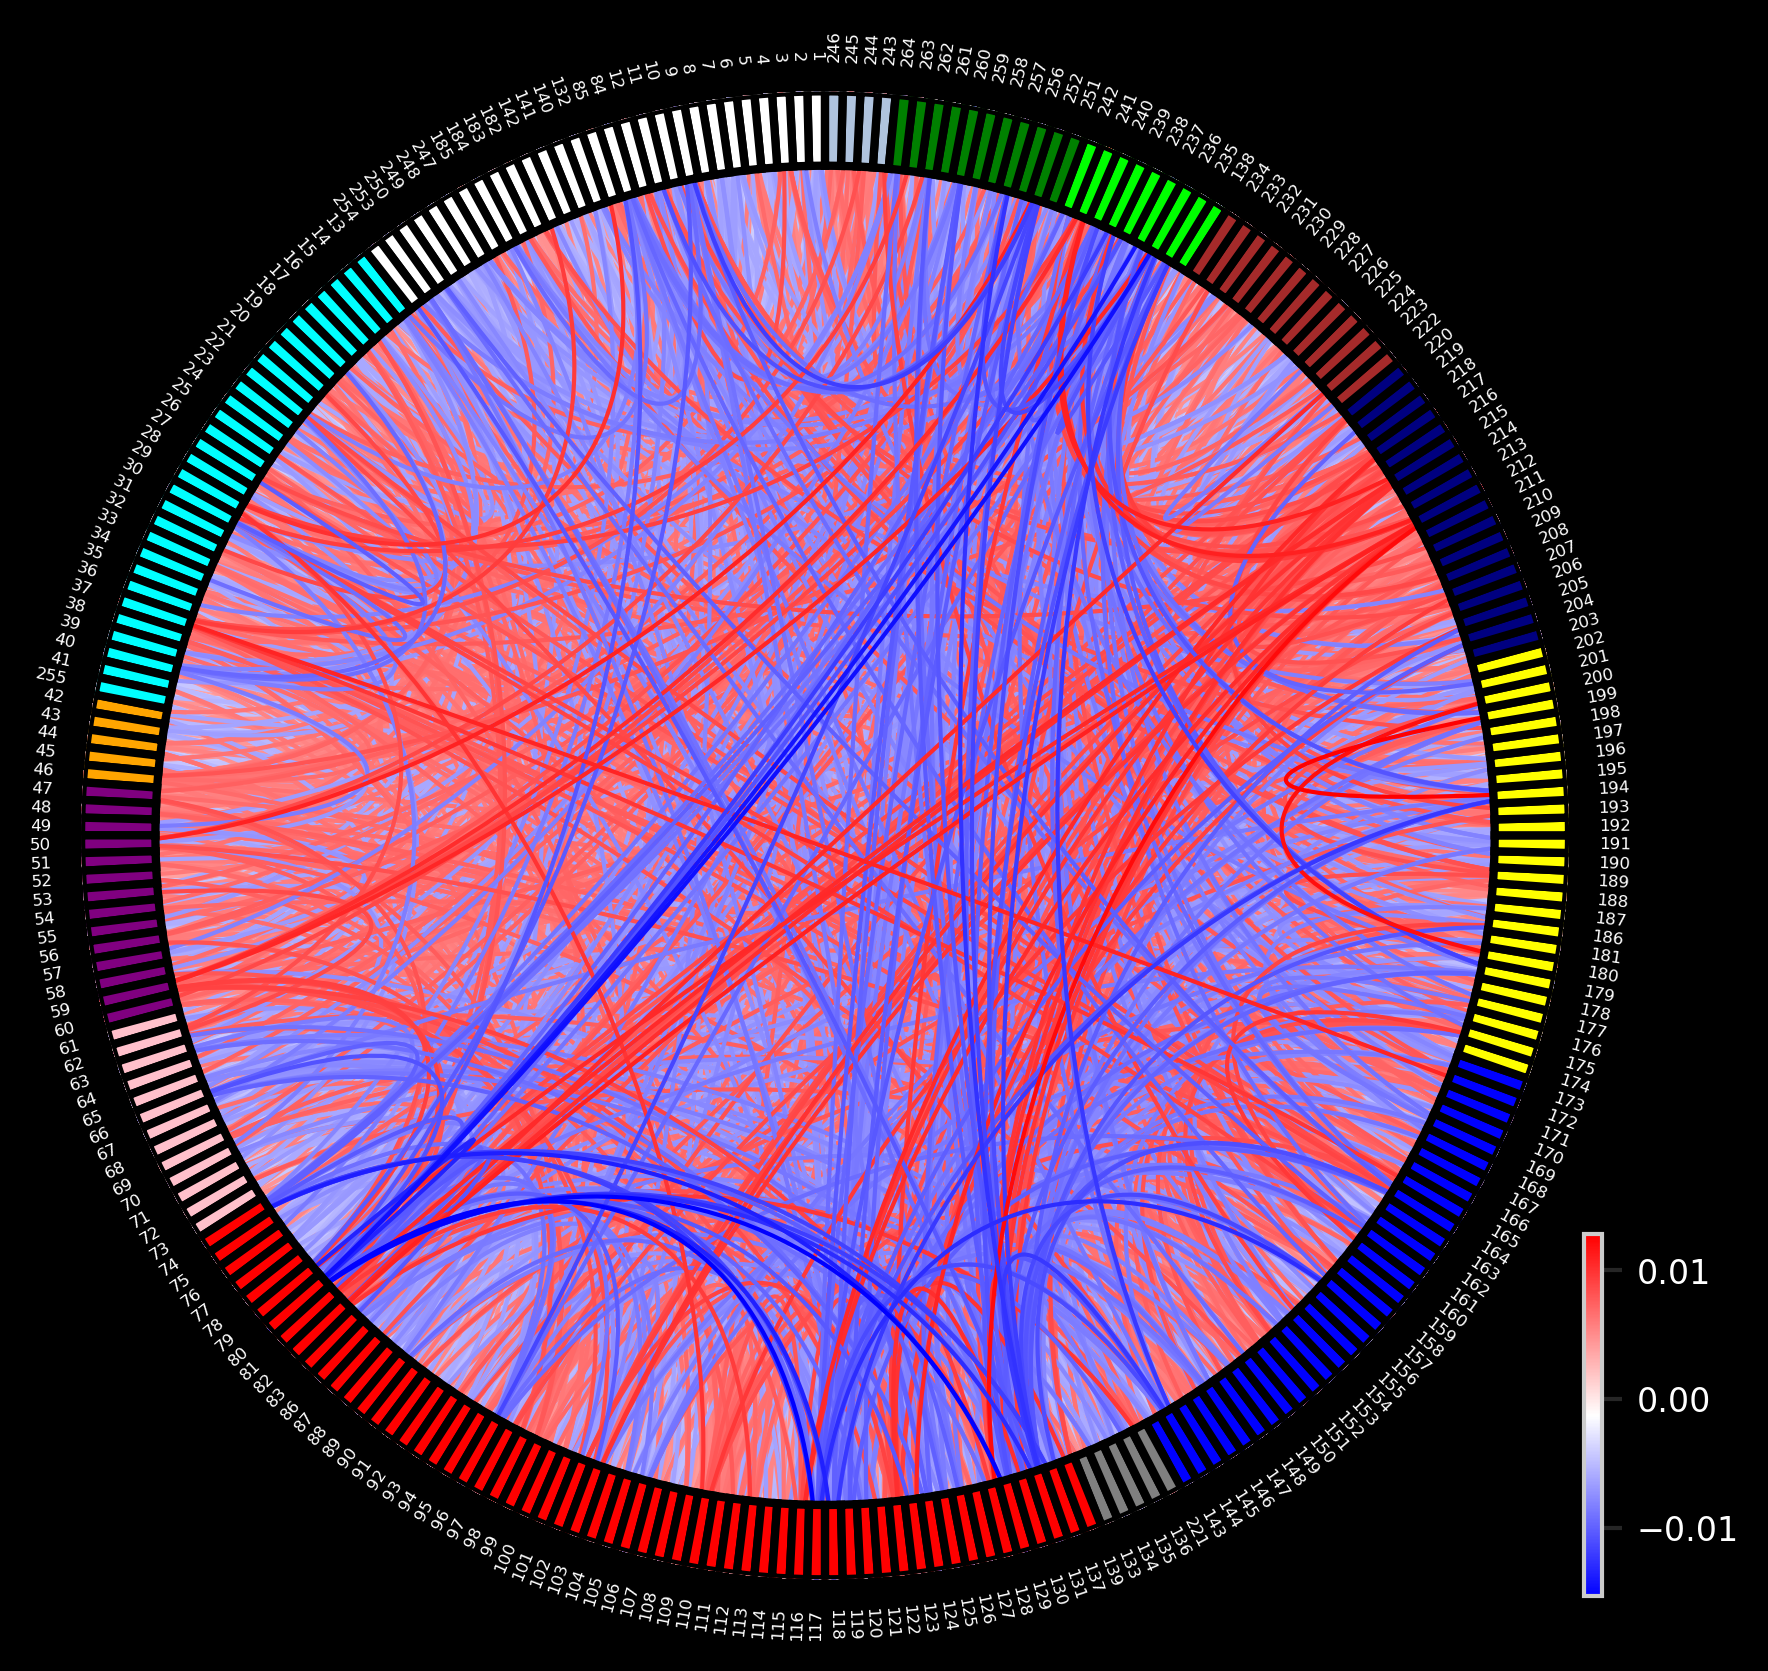

(<Figure size 2400x2400 with 2 Axes>, <PolarAxesSubplot:>)

In [7]:
matrix = create_power_fc_matrix(selected_features)

plot_connectivity_circle(matrix, node_names, n_lines=None, node_angles=node_angles, 
                         fontsize_names=4, padding=0, colormap='bwr', linewidth=1, show=True,
                         node_colors=node_colors)

## Analyze Nodes

In [ ]:
from nilearn import plotting, datasets
from common.calculation import get_k_argmax
from common.plotting import create_power_fc_matrix, convert_fc_to_node_strength

power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T
matrix = create_power_fc_matrix(pls_coef)

# clip connectivity matrix to preserve positive and negative edges
positive_edges = np.clip(matrix, 0, matrix.max())
negative_edges = np.clip(matrix, matrix.min(), 0)

# calculate strength for positive edges
node_strength_positive = convert_fc_to_node_strength(positive_edges)

# calculate strength for negative edges
node_strength_negative = convert_fc_to_node_strength(negative_edges)

print(node_strength_positive.shape, node_strength_negative.shape)
top_pos_nodes = get_k_argmax(node_strength_positive, 10)
top_neg_nodes = get_k_argmax(node_strength_negative, 10)

print(coords[top_pos_nodes], node_strength_positive[top_pos_nodes])
print(coords[top_neg_nodes], node_strength_negative[top_neg_nodes])

plotting.plot_markers(node_strength_positive[top_pos_nodes], coords[top_pos_nodes],
                      node_vmin=0, node_vmax=1, node_cmap="YlOrRd")
plotting.plot_markers(node_strength_negative[top_neg_nodes], coords[top_neg_nodes],
                      node_vmin=0, node_vmax=1, node_cmap="PuBu")